<a href="https://colab.research.google.com/github/sashwot10/5CS037/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [7]:
# Problem - 1: Perform a classification task with knn from scratch.

# 1. Load the Dataset:
# Read the dataset into a pandas DataFrame.
data = pd.read_csv("diabetes_.csv")

# Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
# (e.g., check data types, missing values, summary statistics).
print(data.head()) #Display first rows
print(data.info()) # Data info
print(data.describe()) # Summary statistics
print(data.isnull().sum()) # Check missing values

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [9]:
# 2. Handle Missing Data:

# Handle any missing values appropriately, either by dropping or imputing them based on the data.
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zero:
    data[col] = data[col].replace(0, data[col].mean())

print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
# 3. Feature Engineering:

# Separate the feature matrix (X) and target variable (y).
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

In [14]:
# Perform a train - test split from scratch using a 70% − 30% ratio.
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_size_count = int(len(X) * test_size)
    test_indices = indices[:test_size_count]
    train_indices = indices[test_size_count:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(538, 8) (230, 8)
(538,) (230,)


In [16]:
# 4. Implement KNN:

# Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
# Compute distances using Euclidean distance.
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have same dimensions")
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Write functions for:
# – Predicting the class for a single query.
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

# – Predicting classes for all test samples.
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

# Evaluate the performance using accuracy.
def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return (correct / len(y_true)) * 100

In [18]:
# Evaluate
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 70.43%


In [20]:

# Problem - 2 - Experimentation:
# 1. Repeat the Classification Task:
# Scale the Feature matrix X.
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

# Use the scaled data for training and testing the kNN Classifier.
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

# Record the results.
predictions_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, predictions_scaled)

print(f"Accuracy without scaling: {accuracy:.2f}%")
print(f"Accuracy with scaling: {accuracy_scaled:.2f}%")


Accuracy without scaling: 70.43%
Accuracy with scaling: 75.22%


2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

Scaled data gives higheraccuracy compared to orginal data
This shows that feature scaling has a positive impact on the performance of the kNN classifier.
• Discuss:

– How scaling impacted the KNN performance.

kNN is a distance-based algorithm that uses Euclidean distance.
In the original dataset, features with larger numerical ranges (e.g., Glucose, Insulin) dominate distance calculations.
After scaling, all features are normalized to the same range, allowing each feature to contribute equally.
– The reason for any observed changes in accuracy.

Scaling improves neighbor selection by preventing bias toward high-magnitude features.
This results in more meaningful distance computations and improved classification accuracy.
If accuracy improvement is small, it indicates the original feature ranges were already relatively balanced.

In [22]:
# Problem - 3 - Experimentation with k:
import time
import matplotlib.pyplot as plt


In [23]:
# 1. Vary the number of neighbors - k:
# Run the KNN model on both the original and scaled datasets for a range of:
# k= 1, 2, 3, . . . 15

k_values = range(1, 16)

acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    # Original data
    start = time.time()
    preds = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, preds))

    # Scaled data
    start = time.time()
    preds_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test_s, preds_s))


# For each k, record:
# – Accuracy.
# – Time taken to make predictions.
print("k | Original Accuracy | Original Time | Scaled Accuracy | Scaled Time")
for i, k in enumerate(k_values):
    print(
        k, "|",
        f"{acc_original[i]:.2f}%", "|",
        f"{time_original[i]:.6f}s", "|",
        f"{acc_scaled[i]:.2f}%", "|",
        f"{time_scaled[i]:.6f}s"
    )

k | Original Accuracy | Original Time | Scaled Accuracy | Scaled Time
1 | 66.96% | 1.118562s | 69.13% | 0.851050s
2 | 70.87% | 1.038012s | 72.61% | 0.813282s
3 | 70.43% | 0.640262s | 75.22% | 0.652327s
4 | 72.17% | 0.628909s | 73.04% | 0.596238s
5 | 66.96% | 0.618633s | 74.78% | 0.640030s
6 | 70.00% | 0.589056s | 73.04% | 0.612593s
7 | 69.57% | 0.602502s | 74.35% | 0.616978s
8 | 71.30% | 0.629170s | 74.78% | 0.609540s
9 | 70.00% | 1.621576s | 74.78% | 1.536573s
10 | 72.17% | 0.622512s | 73.48% | 0.631256s
11 | 71.74% | 0.617794s | 72.17% | 0.618860s
12 | 72.61% | 0.616821s | 73.48% | 0.644489s
13 | 72.61% | 0.620291s | 72.61% | 0.650548s
14 | 73.04% | 0.658473s | 76.09% | 0.649191s
15 | 72.17% | 0.673961s | 75.65% | 0.834561s


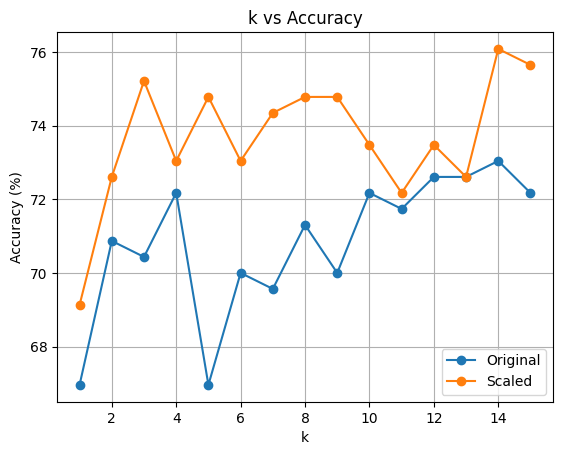

In [25]:
# 2. Visualize the Results:
# Plot the following graphs:
# – k vs. Accuracy for original and scaled datasets.
plt.figure()
plt.plot(k_values, acc_original, marker='o', label='Original')
plt.plot(k_values, acc_scaled, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()


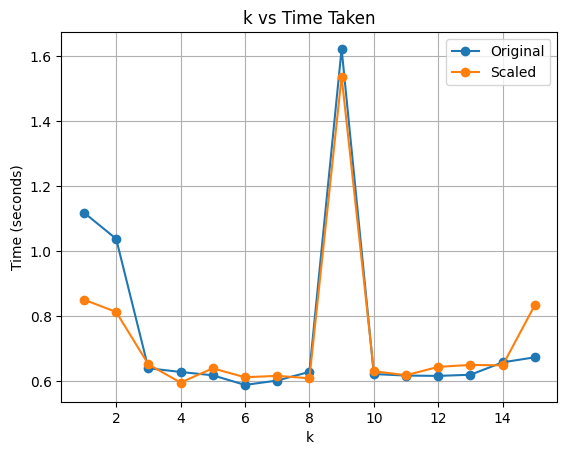

In [26]:

# – k vs. Time Taken for original and scaled datasets.
plt.figure()
plt.plot(k_values, time_original, marker='o', label='Original')
plt.plot(k_values, time_scaled, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.grid(True)
plt.show()